In [1]:
import numpy as np
import PIL
from PIL import Image
from PIL import ImageDraw

In [2]:
def dist(p1,p2):
    dist = np.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
    return dist

In [3]:
## Find the endpoint of a line segment with given start coordinate (x,y), angle (in radians) and distance
### returns endpoint with x and y values rounded to (closest?) integer, optional argument if angle given in degrees
def line_segment_endpoint(coord, angle, dist, degrees = False):
    if degrees == True:
        angle = angle * np.pi/180
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))
    else:
        return (int(dist*np.cos(angle) + coord[0]), int(dist*np.sin(angle) + coord[1]))

In [4]:
#Create a quick script that will take two points and output a third point that would make the triangle an isoceles triangle with given interior angle
# should they all be connected
def complete_isoceles(p1,p2, int_angle):
    
    if (p2[1] >= p1[1]):
        theta = np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi
    else:
        theta = 360 - np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi
    
    hyp = dist(p1,p2)/(2*np.cos(int_angle*np.pi/180))
    #print(hyp)
    #print(theta)
    #print(int_angle)
    p3 = line_segment_endpoint(p1,theta+int_angle,hyp, degrees = True)
    
    return p3

In [13]:
def descending_triangles(draw, pair_list, angle, iterations):
    if iterations == 0:
        return "Done"
    try:
        new_pairs = []
        for pair in pair_list:
            draw.line([pair[0], pair[1]], fill = (255,255,255,255), width =2)
            p3 = complete_isoceles(pair[0],pair[1], angle)
            new_pairs.append((pair[0],p3))
            new_pairs.append((p3,pair[1]))
            #print(new_pairs)
    except:
        return "Done"
        
    return descending_triangles(draw, new_pairs, angle, iterations-1)

In [14]:
scene = []
for i in range(89):
    image = Image.new("RGBA", (2000,2000), (0,0,0,255))
    draw = ImageDraw.Draw(image)
    
    p1 = (600,1350)
    p2 = (1500,1350)
    p3 = (1000,557)
    
    descending_triangles(draw, [(p1,p2)], i, 15)
    descending_triangles(draw, [(p2,p3)], i, 15)
    descending_triangles(draw, [(p3,p1)], i, 15)
    scene.append(image)

<ipython-input-4-b751eae67b7d>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi


In [18]:
new_scene = []
for image in scene:
    new_scene.append(image.resize((500,500),PIL.Image.NEAREST))

In [19]:
new_scene[0].save("moving_5.gif", save_all=True, append_images=new_scene[1:], optimize=False, duration=300, loop=0)

<ipython-input-4-b751eae67b7d>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi


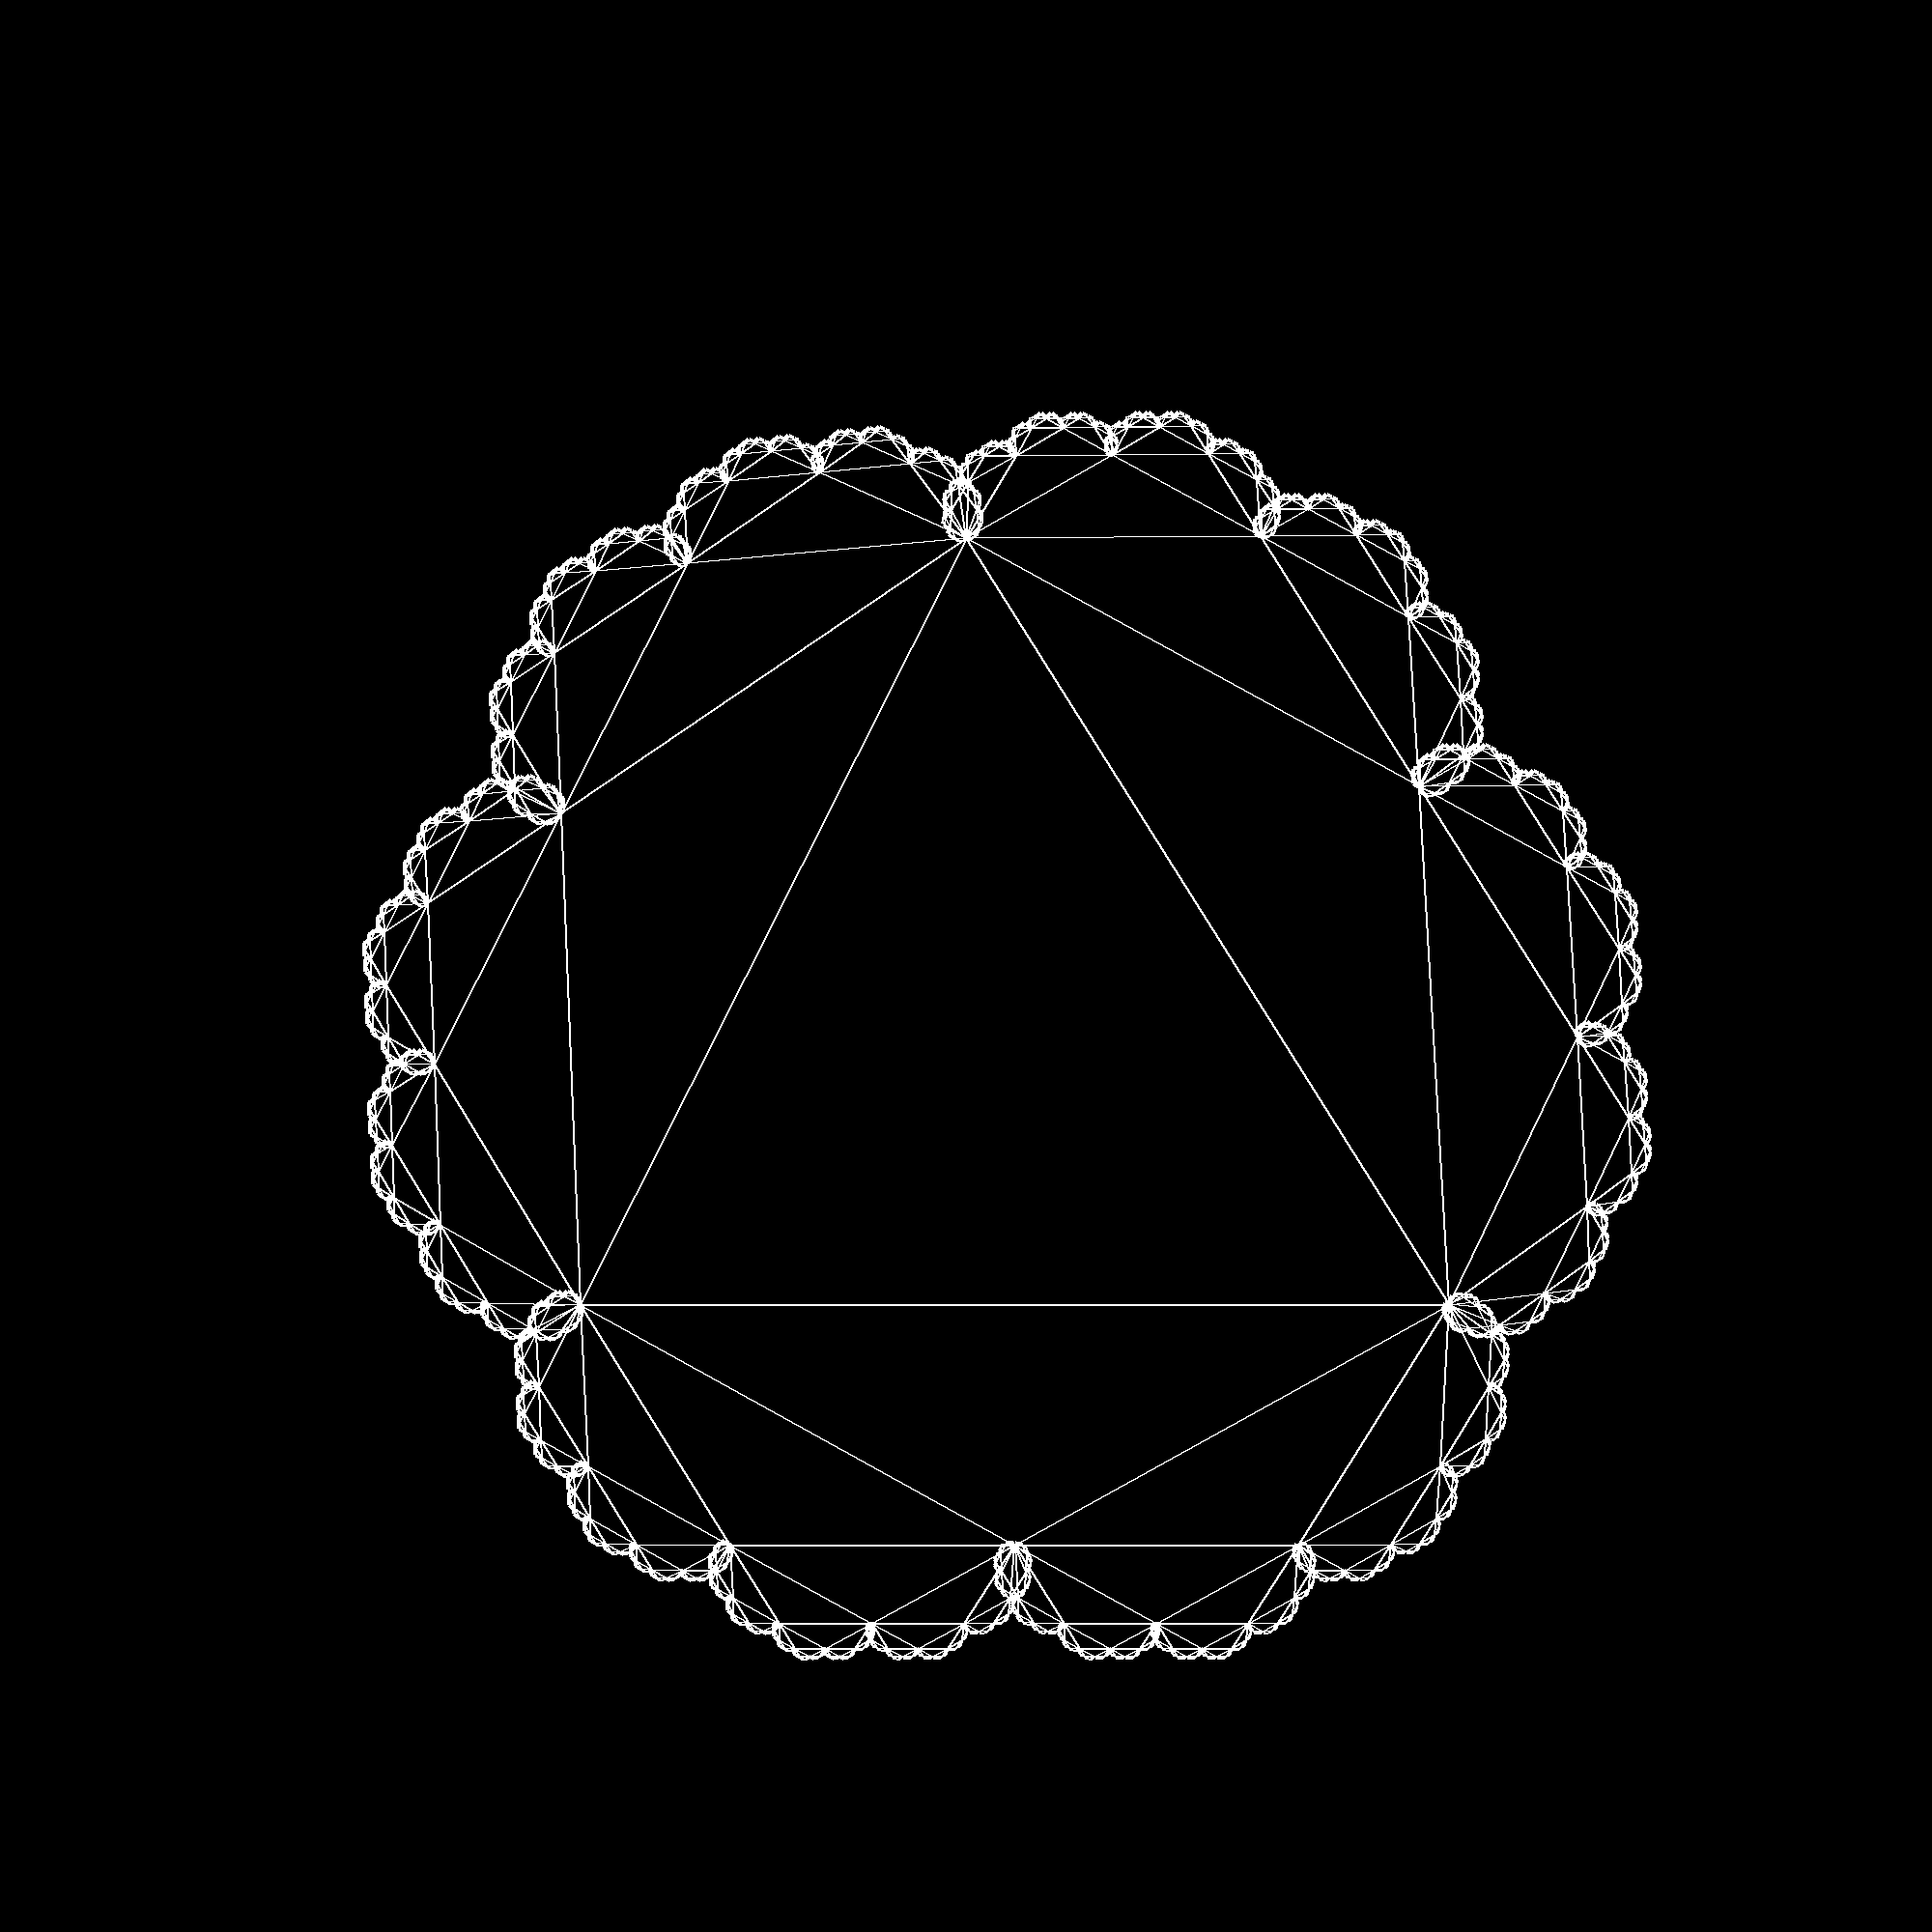

In [27]:
image = Image.new("RGBA", (2000,2000), (0,0,0,255))
draw = ImageDraw.Draw(image)
    
p1 = (600,1350)
p2 = (1500,1350)
p3 = (1000,557)
    
descending_triangles(draw, [(p1,p2)], 29, 20)
descending_triangles(draw, [(p2,p3)], 29, 20)
descending_triangles(draw, [(p3,p1)], 29, 20)
image

In [41]:
def descending_color_triangles(draw, pair_list, angle, color, iterations):
    if iterations == 0:
        return "Done"
    try:
        new_pairs = []
        for pair in pair_list:
            #draw.line([pair[0], pair[1]], fill = (255,255,255,255), width =2)
            p3 = complete_isoceles(pair[0],pair[1], angle)
            new_pairs.append((pair[0],p3))
            new_pairs.append((p3,pair[1]))
            draw.polygon([pair[0],pair[1],p3], color, color)
    except:
        return "Done"
        
    return descending_color_triangles(draw, new_pairs, angle, (color[0]+20,color[1]-10,color[2]-20), iterations-1)

<ipython-input-4-b751eae67b7d>:6: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos((p2[0]-p1[0])/dist(p1,p2))*180/np.pi


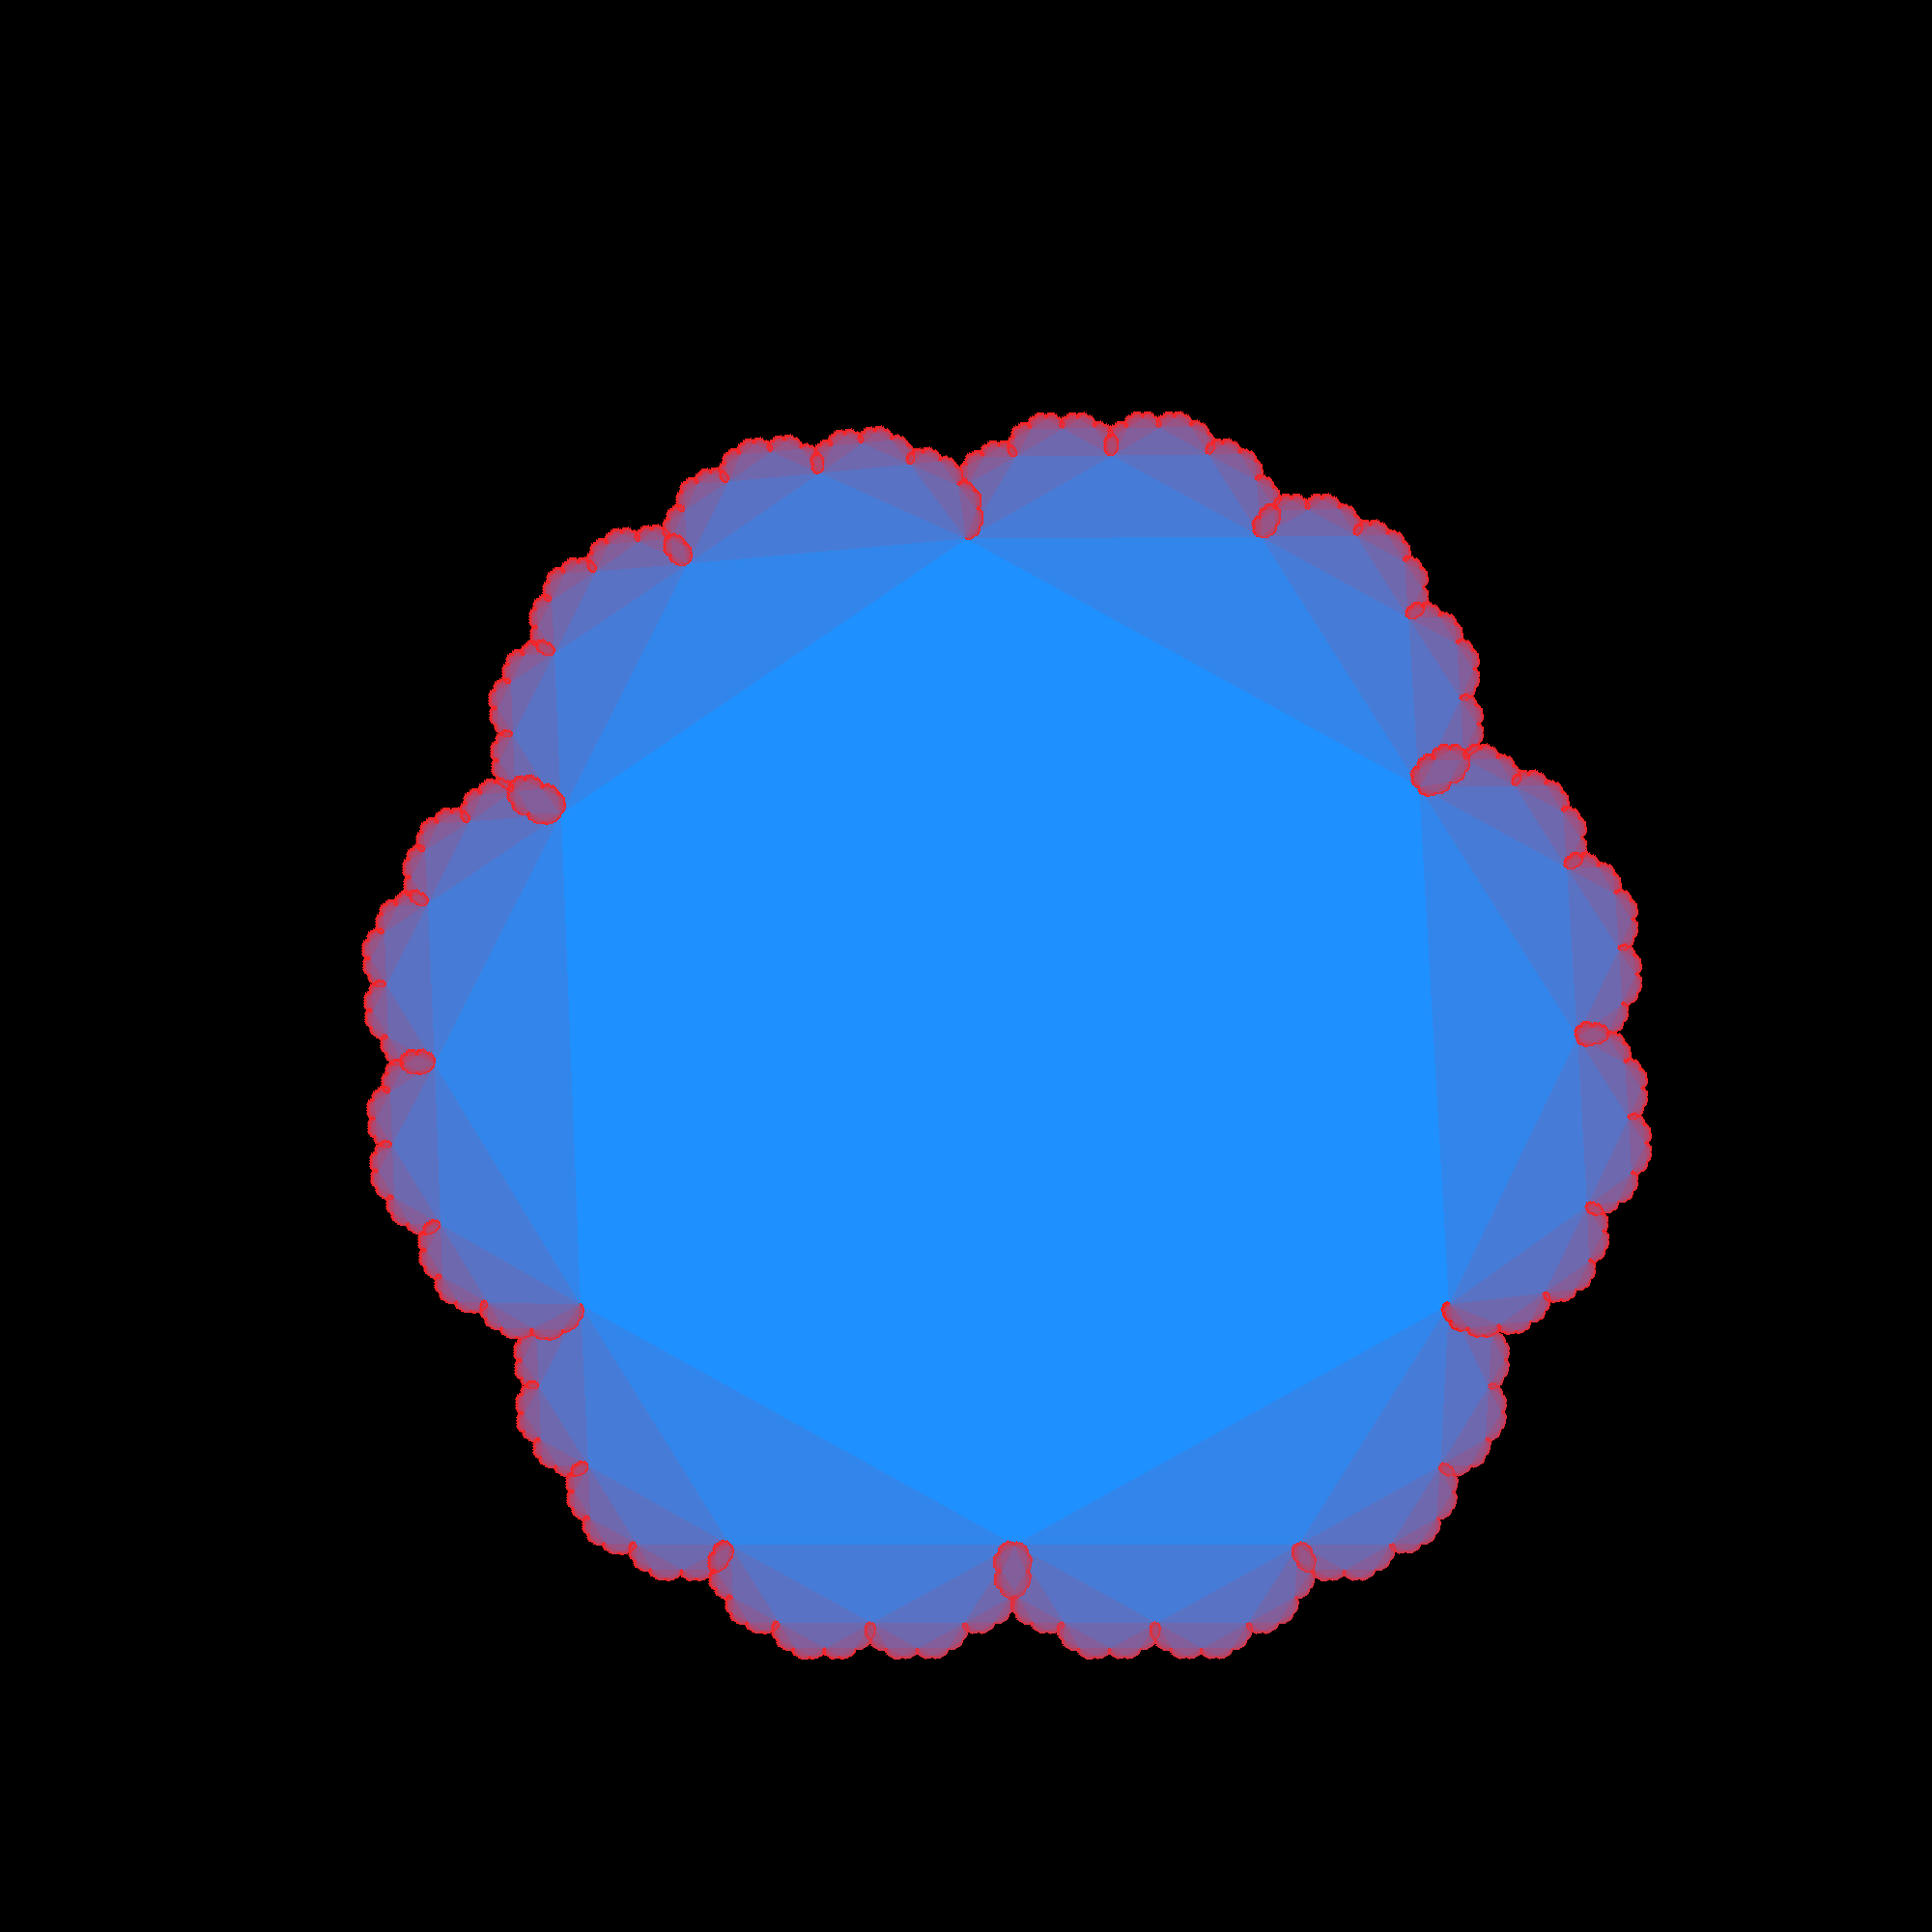

In [42]:
image = Image.new("RGBA", (2000,2000), (0,0,0,255))
draw = ImageDraw.Draw(image)
    
p1 = (600,1350)
p2 = (1500,1350)
p3 = (1000,557)

color = (30,144,255)

draw.polygon([p1,p2,p3], color, color)

descending_color_triangles(draw, [(p1,p2)], 29, color, 20)
descending_color_triangles(draw, [(p2,p3)], 29, color, 20)
descending_color_triangles(draw, [(p3,p1)], 29, color, 20)
image